# Beyond more/less segregation: 
## Quantifying and forecasting dynamics of residential segregation using Density-functional fluctuation theory applied to a binary version of the Schelling model of segregation

Here, we demonstrate the Density-Functional Fluctuation Theory (DFFT) approach to modeling residential segregation using a binary version of the classic Schelling model. To do so, we perform five different demonstrations.
1. Present the inherent limitations of traditional indices of segregation.
2. Demonstrate how to extract DFFT functions from observations of the population fluctuations.
3. Empirically demonstrate compositional invariance, the independence of our segregation function from the overall composition of a city.
4. Empirically demonstrate sample size invariance, the independence of our segregation function from the number of individuals in a neighborhood.
5. Forecasting dynamics (feature to come).


### The Schelling Model
Before we describe our methods, we first must introduce the Schelling Model, a standard agent-based model of residential segregation. In our implementation, in each simulation step, a red and a blue agent are randomly chosen. Each agent agent then looks at the the number of each type of neighbors in its current location and the other agent's locations and calculates their changes in utility, a function of the identity of its neighbors. The agents will choose to...
* definitely switch locations if it improves its utility.
* probabilistically switch depending on how much it decreases its utility.

In so doing, if the user-defined utility functions increase with the nubmer of same-type neighbors, then segregation will ensue.

### INSTRUCTIONS
For a walkthrough using default parameters, just scroll down the page and ignore any "SIMULATION AND PLOTTING CODE" sections. For a more interactive exploration, each cell of code is designed to run standalone. Within that cell, you can modify "USER DEFINED PARAMETERS" to the simulations and see how those modifications impact the resulting analysis.

For these simulations, users are able to tune some or all of the following parameters.
* `frac_blue` -> The fraction of agents that are blue. The remainder of the agents will be red
* `utility_function_blue`,`utility_function_red` -> The utility a blue/red agent perceives when surrounded by a given number of blue/red agents in an 8-connected neighborhood. For example, if `utility_function_blue = [1,2,2,5,8,8,8,8,8]`, then a blue agent would experience an increase in utility of 4 if it moved from a position with 0 blue neighbors (utility = 1) to a position with 3 blue neighbors (utility = 5).

Additional, less relavant, parameters:
* `lattice_length` -> Edge length of the simulated city. The number of sites in the entire city is equal to `lattice_length^2`.
* `bin_length` -> Edge length of a neighborhood for gathering statistics. The number of sites in the entire city is equal to `bin_length^2`. `lattice_length` should be divisible by `bin_length`.
* `num_simulation_steps` -> Total number of times each agent is asked to move one time. Increase this variable to get better statistics, or decrease to make the simulation finish faster.

## 1) Traditional segregation indices can lead to oversimplification
The most common approach to quantifying segregation from population counts involves using either the Dissimilarity Index (D) or entropy-based Theil index (T). These indices quantify how far from evenly distributed people are across an area. Although a great deal of work has been done in fine-tuning and extending these indices to more complex scenarios, the fundamental issue with reducing segregation to a single number is that a great deal of information about *how* the city is segregated is lost. To demonstrate this idea, the next three cells use distinct utility functions to simulate distinct cities with distinct histograms of neighborhood compositions, and yet are described by the same segregation indices. 


┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif")
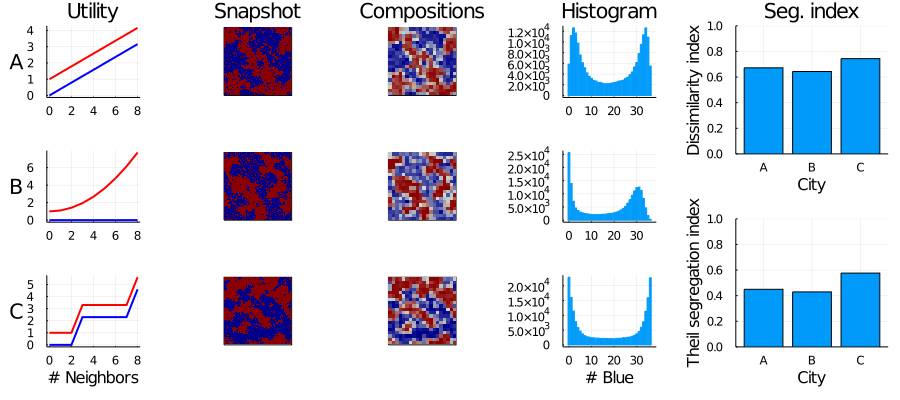

In [156]:
##### Binary segregation index comparison
###########CITY A ##############
utility_function_blue_A = 0.395.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_A = 0.395.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1

###########CITY B ##############
utility_function_blue_B = 0.0.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_B = 0.105.*[0, 1, 2, 3, 4, 5, 6, 7, 8].^2.0 .+ 1

###########CITY C ##############
utility_function_blue_C = 2.3.*[0, 0, 0, 1, 1, 1, 1, 1, 2]#0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red_C = 2.3.*[0, 0, 0, 1, 1, 1, 1, 1, 2].+1

# utility_function_blue_C = 2.6.*[0, 0, 0.5, 1, 1, 1, 1, 1, 2]#0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
# utility_function_red_C = 2.6.*[0, 0, 0.5, 1, 1, 1, 1, 1, 2].+1

# utility_function_blue_C = 3.2.*[0, 0, 0, 0.5, 1, 1.5, 1.2, 0.9, 0.6]#0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
# utility_function_red_C = 3.2.*[0, 0, 0, 0.5, 1, 1.5, 1.2, 0.9, 0.6].+1

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")
bin_length = 6
num_simulation_steps = 500

counts_single_A, lattice_snapshots_A, utility_function_blue_A, utility_function_red_A = run_schelling_sim_binary(;
    lattice_length = 120,frac_blue_agents = 0.5,num_simulation_steps = num_simulation_steps,
    utility_function_blue = utility_function_blue_A,utility_function_red = utility_function_red_A,bin_length = bin_length)

counts_single_B, lattice_snapshots_B, utility_function_blue_B, utility_function_red_B = run_schelling_sim_binary(;
    lattice_length = 120,frac_blue_agents = 0.5,num_simulation_steps = num_simulation_steps,
    utility_function_blue = utility_function_blue_B,utility_function_red = utility_function_red_B,bin_length = bin_length)

counts_single_C, lattice_snapshots_C, utility_function_blue_C, utility_function_red_C =run_schelling_sim_binary(;
    lattice_length = 120,frac_blue_agents = 0.5,num_simulation_steps = num_simulation_steps,
    utility_function_blue = utility_function_blue_C,utility_function_red = utility_function_red_C,bin_length = bin_length)

num_snapshots = size(lattice_snapshots_A,3)
anim = @animate for i ∈ 1:num_snapshots
    segregation_indices_distributions_comparison_binary_figure(lattice_snapshots_A[:,:,i],counts_single_A,utility_function_blue_A,utility_function_red_A,
        lattice_snapshots_B[:,:,i],counts_single_B,utility_function_blue_B,utility_function_red_B,
        lattice_snapshots_C[:,:,i],counts_single_C,utility_function_blue_C,utility_function_red_C)
end
gif(anim, "tmp.gif", fps = 2)


Three cities (A, B, and C) possess different Utility functions defining their segregation preferences. These segregation functions lead to 3 distinct histograms that are all described by almost identical segregation indices. Since each of these three distinct cities is described by the same segregation index, important information about the nature of the segregation is inevitably lost when reducing these distributions to a single numeric value.  

## 2) DFFT transformation of probability distributions
As shown above, a single index loses a great deal of information about the nature of the segregation that is retained within the probability distribution. We wish to retain all of the information within the probability distribution and to do so in a manner that is (1) interpretable and (2) predictive. To that end, we perform the following transformation to the probability distributions shown in column (3) of the plots above. Before reading ahead though, note that this notebook will walk you through the different steps of the math below and you do not need to understand all its elements at this point but simply that we are going to take the probability distributions and transform them in a special way that lets us decompose them into parts that describe the interactions between agents separately from the composition of the city overall, and moreover does it in a way that can be independent of the size of the neighborhood.

#### Binary DFFT transformation without empty cells
\begin{equation}
\tag{1}
P(n;s) = \binom{s}{sn}e^{-sH(n) - z_s} \label{eq0}
\end{equation}

\begin{equation}
\tag{2}
-log(P(n;s))+log(\binom{s}{sn}) = sH(n) + z_s= s(f(n) + Vn) + z_s\label{eq1}
\end{equation}

where
* $s$ is the total number of sites in a neighborhood
* $n$ is the fraction of sites in the neighborhood that are blue
* $\binom{s}{sn}$ is the combinatorial binomial factor
* $P$ is the probability of observing a given composition of blue agents
* $H$ is our DFFT function of the composition of a neighborhood
* $f$ represents the curvature of the Headache function that characterizes the social interactions between the agents. Specifically, it quantifies how the distribution deviates from a random binomial distribution
* $V$ is a constant that accounts for the number of people in the overall city that are blue. This constant is analogous to the idea of "potential" from physics where there should be *fewer* agents in cities with *higher* values of $V$.
* $z_s$ is a constant shift that represents a normalization constant that is arbitrary and can be ignored. It is dependent on the number of sites in a neighborhood, $s$.

The next cell demonstrates how we obtain our DFFT functions using the algebraic transformation defined above.

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif")
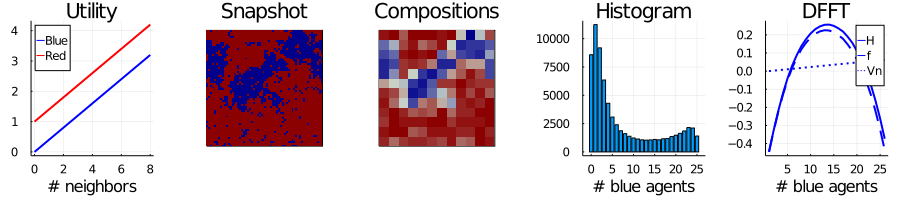

In [1]:
##### Binary H decomposition
##############################
#USER DEFINED PARAMETERS
frac_blue = 0.3
utility_function_blue = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
bin_length = 5 #lattice_length of default 60 should be divisible by bin_length

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_single, lattice_snapshots, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length
    )

anim = @animate for i ∈ 1:size(lattice_snapshots,3)
    intro_headache_binary_figures(lattice_snapshots[:,:,i],counts_single,utility_function_blue,utility_function_red)
end
gif(anim, "tmp.gif", fps = 2)

# p_tmp = intro_headache_binary_figures(lattice_snapshots[:,:,1],counts_single,utility_function_blue,utility_function_red)
# p_tmp

The utility functions (upper left) define the segregation behavior observed in the city (upper right) that leads to the histogram counting the number of times a given number of blue agents is observed across all the neighborhoods and many snapshots (bottom left). This histrogram is then transformed into the DFFT function $H(n)$ using equation (1) above. The $H(n)$ function is then decomposed into a linear part, $Vn$, that describes the fraction of people in the overall city that are blue and a curvature part, $f(n)$, that quantifies the segregation tendencies of the population and whose negative curvature indicates segregation.

# Why use a DFFT transformation to quantify segregation?
Now that we have explored how we transform a probability distribution into our DFFT functions, we should answer *why* we do it. In the sections to come, we will demonstrate the following benefits of DFFT over simply looking at the raw probability distributions.

## 3) Compositional invariance
Any quantification of segregation should be separate from the effects of the composition of the city as a whole. For example, we might want to compare segregation between a city that is mostly red with another city that is mostly blue. It is not immediately clear how to do that with raw probability distributions, but DFFT functions allow for immediate comparison. We must first, however, verify whether two cities with two cities with the same segregation behavior but different city-wide compositions share the same segregation function, $f$, but possess different constants, $V$, correspond to the different overall compositions of the city.

No method to date, including DFFT, can guarantee compositional invariance for any arbitrary population. We can, however, guarantee compositional invariance under the assumption that neighborhood compositions are sufficient descriptors of the system. If, for example, the organization of agents within the neighborhood is important, then our method may not be exact. This section serves to demonstrate that changes in the city-wide composition are *approximately* reflected by shifts in the variable $V$. We have, however, shown that this approximation is very good across a range of reasonable Schelling simulations and powerful enough to make very accurate forecasts of population dynamics.

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif")
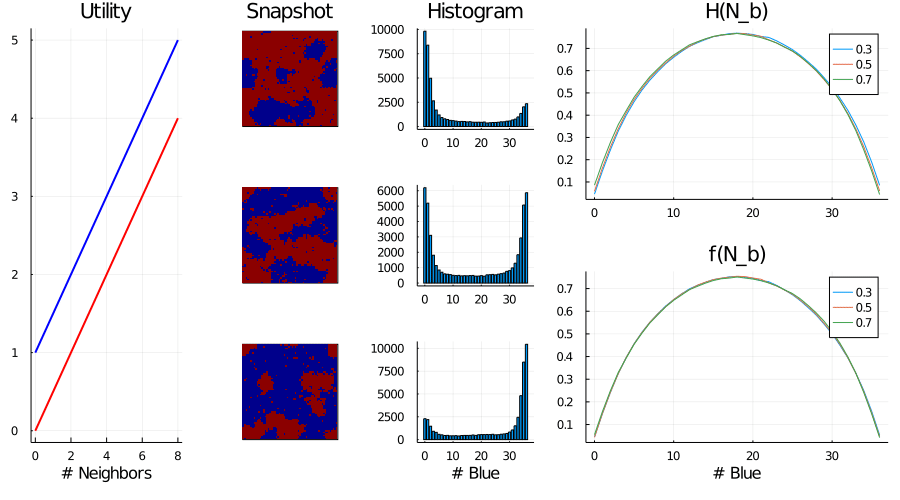

In [155]:
## BINARY Composition Invariance
#######################################
#USER DEFINED PARAMETERS
fraction_blue_1 = 0.3
fraction_blue_2 = 0.5
fraction_blue_3 = 0.7

utility_function_blue = 0.5 .* [0, 1, 2, 3, 4, 5, 6, 7, 8] .+ 1
utility_function_red = 0.5 .* [0, 1, 2, 3, 4, 5, 6, 7, 8]

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")
bin_length = 6

counts_single_1, lattice_snapshots_1, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;frac_blue_agents = fraction_blue_1,utility_function_blue = utility_function_blue,utility_function_red = utility_function_red,
    bin_length = bin_length)

counts_single_2, lattice_snapshots_2, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;frac_blue_agents = fraction_blue_2,utility_function_blue = utility_function_blue,utility_function_red = utility_function_red,
    bin_length = bin_length)

counts_single_3, lattice_snapshots_3, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;frac_blue_agents = fraction_blue_3,utility_function_blue = utility_function_blue,utility_function_red = utility_function_red,
    bin_length = bin_length)

anim = @animate for i ∈ 1:size(lattice_snapshots_1,3)
    compositional_invariance_binary_figure(lattice_snapshots_1[:,:,i],counts_single_1,fraction_blue_1,lattice_snapshots_2[:,:,i],counts_single_2,fraction_blue_2,lattice_snapshots_3[:,:,i],counts_single_3,fraction_blue_3,utility_function_blue,utility_function_red)
end
gif(anim, "tmp.gif", fps = 2)


Three different cities whose agents obey the exact same segregation behavior defined by the utility functions for red and blue agents but possessing different fractions of blue agents (0.3, 0.5, and 0.7) giving rise to three distinct histograms. These three histograms lead to three $H(n)$ functions that possess the same curvature as shown by their identical segregation functions $f(n)$. The invariance of the segregation function, $f(N)$, to changes in the overall composition of the city thus suggests that DFFT functions obey the property of compositional invariance.

## 4) Sample size invariance
When analyzing residential population counts of census data, rarely do we have access to choosing the neighborhood size with which to coarse grain a real city. For example, the US census provides counts of the number of persons by race in census defined spatial blocks of varying geometries and total populations, but not the individual locations of people due to privacy concerns. To study segregation using such data, a method must be able to account for the effect of sampling over neighborhoods with different total numbers of people. In order to fit such data then, we must allow each "neighborhood" to have its own total population. Although DFFT naturally accounts for sample size, $s$, we cannot guarantee that our $H$ function is actually independent of the sample $s$ since, as we have increase our neighborhood size, we may well observe different behaviors. We *can* however emprically investigate in simulations whether our DFFT functions are indeed independent of the sample size. 

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif")
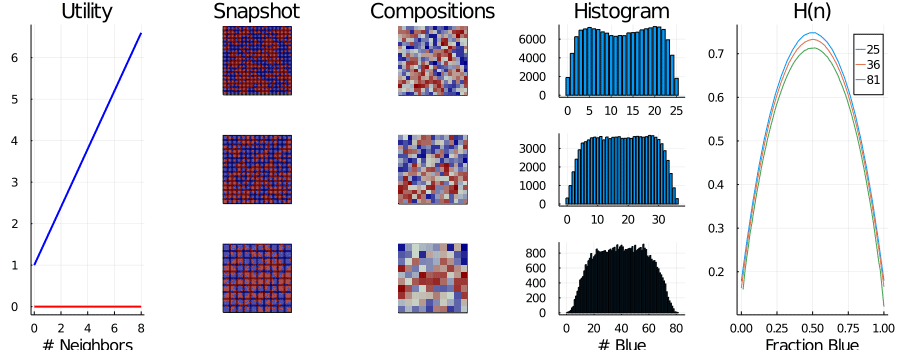

In [151]:
#Sample size invariance Binary
## BINARY Sample Size Invariance
#######################################
#USER DEFINED PARAMETERS
lattice_length = 90
bin_length_1 = 5 #Lattice_length should be divisible by bin_length
bin_length_2 = 6
bin_length_3 = 9

frac_blue = 0.5
utility_function_blue = 0.7 .* [0, 1, 2, 3, 4, 5, 6, 7, 8] .+ 1
utility_function_red = 0.0 .* [0, 1, 2, 3, 4, 5, 6, 7, 8]

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")
counts_single_1, lattice_snapshots_1, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length_1,
    lattice_length = lattice_length
    )

counts_single_2, lattice_snapshots_2, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length_2,
    lattice_length = lattice_length
    )

counts_single_3, lattice_snapshots_3, utility_function_blue, utility_function_red =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length_3,
    lattice_length = lattice_length
    )

anim = @animate for i ∈ 1:size(lattice_snapshots_1,3)
    sample_size_invariance_binary_figure(lattice_snapshots_1[:,:,i],counts_single_1,frac_blue,
        lattice_snapshots_2[:,:,i],counts_single_2,frac_blue,
        lattice_snapshots_3[:,:,i],counts_single_3,frac_blue,
        utility_function_blue,utility_function_red)
end
gif(anim, "tmp.gif", fps = 2)


The same city is simulated three times using neighborhoods with different coarse grained neighborhood populations (25, 36, and 64) leading to different histograms but the similar $H(n)$ functions. Here, we applied a constant shift $H(n)+C$ to make the curves overlap since the different neighborhood sizes, $s$, result in different normalization constants, $C$, which are meaningless in our model. The independence of the $H(n)$ function to changes in the neighborhood size suggests that, to a good approximation across these neighborhood sizes, DFFT obeys sample size invariance. 

## 5) DFFT functions quantify the dynamics of neighborhood compositions

In addition to quantifying segregation, DFFT functions are capable of forecasting how neighborhoods are likely to change into the future. We demonstrate this principle on our Schelling model in detail for more challenging scenarios in our paper (ARXIV REFERENCE), but present here a simpler demonstration.

To model the rate at which a neighborhood is likely to increase or decrease its composition by 1, we use the rates 
\begin{align}
    R\,(N \rightarrow N-1) &= N/(1+e^{s\Delta H\,(N \rightarrow N-1)})\\
    R\,(N \rightarrow N+1) &= (s-N)/(1+e^{s\Delta H\,(N \rightarrow N+1)})\\
    R\,(N \rightarrow N) &= 1 - R\,(N \rightarrow N+1) - R\,(N \rightarrow N-1),
\end{align}
where $N$ is the number of blue agents in a given neighborhood, $s$ is the total number of people in the neighborhood, and $\Delta H$ is the change in the $H(N)$ function for the proposed change. The $N$ and $(s-N)$ terms in the numerators of the first two equations capture the probability that the change in composition will come from the blue or red agents respectively being the one who moves. For example, a neighborhood full of blue agents should be more likely to become more red simply because it has more blue agents that can turn into red ones. The $1/(1+exp(\Delta H(N \rightarrow N-1))$ and $1/(1+exp(\Delta H(N \rightarrow N+1))$ factors then can be derived from the relative probabilities of the composition before and after the change in composition. The third equation only serves to normalize the rates equations. Importantly, these rates equations obey detailed balance which guarantees that, for a well-behaved headache function $H(n)$, after sufficient number of transitions a neighborhood will always evolve to the steady-state distribution $P(n;s) = \binom{s}{sn}exp(-sH(n))$.

To demonstrate this dynamic behavior, below we run a Schelling simulation, observe the probability distribution, $P(n)$, then transform that into the Headache function $H(n)$. From that function, we then calculate the rate at which a neighborhood with a given initial composition is likely to switch one blue agent into a red agent (b->r), switch one red agent into a blue agent (r->b) or remain the same. Lastly, we validate whether these rate equations match the actual dynamics. We do so by first plotting as a heatmap the observed probability a neighborhood with a given initial composition (x-axis) will have a given future composition (y-axis). Each column of this heatmap is a normalized probability distribution that sums to one. We then compare these observed probablity distributions to the ones we forecast using the rate equations above. Note that there is an additional single parameter required here to align the time scales.

┌ Info: Saved animation to 
│   fn = /home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif
└ @ Plots /home/yunuskink/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/yunuskink/Dropbox/Demography/DFFT-Schelling-model/tmp.gif")
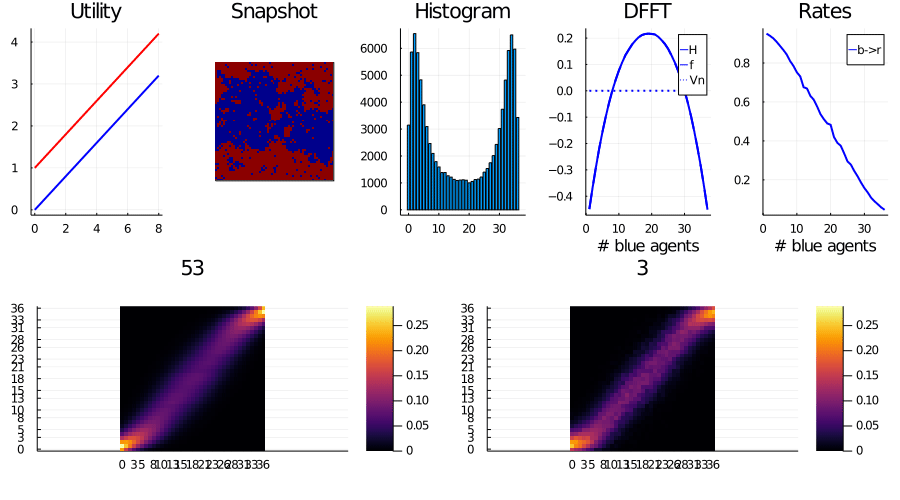

In [5]:
#Binary H interpretation
frac_blue = 0.5
utility_function_blue = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8]
utility_function_red = 0.4.*[0, 1, 2, 3, 4, 5, 6, 7, 8].+1
bin_length = 6 #lattice_length (default 60) should be divisible by bin_length
num_simulation_steps=1000
schelling_interval = 3
num_intervals = 10

##############################
#SIMULATION AND PLOTTING CODE
include("schelling_functions.jl")

counts_single, lattice_snapshots, utility_function_blue, utility_function_red, bin_counts_dt =
    run_schelling_sim_binary(;
    frac_blue_agents = frac_blue,
    utility_function_blue = utility_function_blue,
    utility_function_red = utility_function_red,
    bin_length = bin_length,
    num_simulation_steps = num_simulation_steps,
    dt = 1,
    collect_dynamics = true,
    num_snapshots = num_intervals #Just set them equal for the gif I make later
    )

tau, T_matrix_rates, T_matrix_schelling = align_time_scales(counts_single,bin_counts_dt,schelling_interval)

anim = @animate for i ∈ 1:num_intervals
    T_matrix_schelling = observe_dynamics_binary(bin_counts_dt,i*schelling_interval,bin_length^2)
    T_matrix_DFFT = T_matrix_rates^(tau*i)
    dynamics_binary_figures(lattice_snapshots[:,:,i],counts_single,utility_function_blue,utility_function_red,
        T_matrix_schelling,T_matrix_DFFT,i*schelling_interval,tau*i)
end

gif(anim, "tmp.gif", fps = 2)


Utility functions (a) used for the Schelling simulation (b) that leads to the histogram (c) of observing a given composition transformed to obtain the headache function (d) used to calculate the rate equations (e). The rate equations shown in (e) are the probability of a neighborhood to switch one blue agent to a red agent (b->r), one red agent to a blue agent (r->b), or remain unchanged. (f) and (g) plot the probability (color shading) of observing a future composition (y-axis) for a neighborhood that starts with a given initial composition (x-axis). These plots can be interpreted as transition matrices whose columns are normalized so that they sum to one. The forecasted probabilities were calculated using the rate equations shown in (e). We have shown agreement between the forecasted and observed distributions for a variety of Schelling models. The agreement between the forecasted probability distributions and the observed ones suggests that our simple dynamical model is sufficient to forecast how a given neighborhood is likely to change its composition into the future in the steady state, but we have performed more complex forecasts for out-of-equilibrium cities in heterogeneous environments described in our work (ARXIV).

# Future work: Application to US Census data
Finally, we come to the point where we can investigate how this method can extend to human data. Specifically, does this method work on human data? We save detailed analysis of human data for a notebook coming soon, but we leave here a preliminary result that suggests that our methods can not only provide new insights into the nature of residential populations, it can even forecast how neighborhoods are likely to change!

Shown below is a forecast using methods similar to those described above. We forecast the probability (shading) of finding a composition in the year 2010 of non-Hispanic White persons (y-axis) in a neighborhood that starts with a given initial composition (x-axis) in the year 2000 for the four most populus counties in the US. We then overlay points representing the observed dynamics of neighborhood compositions and see quantitative agreement between the dynamics of neighborhoods and our forecasts. Specifically, while White populations across all four counties were known to proportionally decrease, our forecasts was able to capture quantitatively the trend that the neighborhoods that experienced the greatest decrease in White composition were the more integrated neighborhoods. These integrated neighborhoods decreased faster than would be expected by a simple proportional shift (shown by the straight yellow line). Meanwhile, predominantly White neighborhoods continued to stay predominantly White and our method was able to capture that as well. 

We wish to emphasize that this is a first-of-its-kind demographic forecast. Typically, population forecasts work on much larger scales, thus no method to date has been developed to do neighborhood scale forecasts that account for the effects of segregation. Stay tuned to see forecasts of your neighborhood of choice soon! 

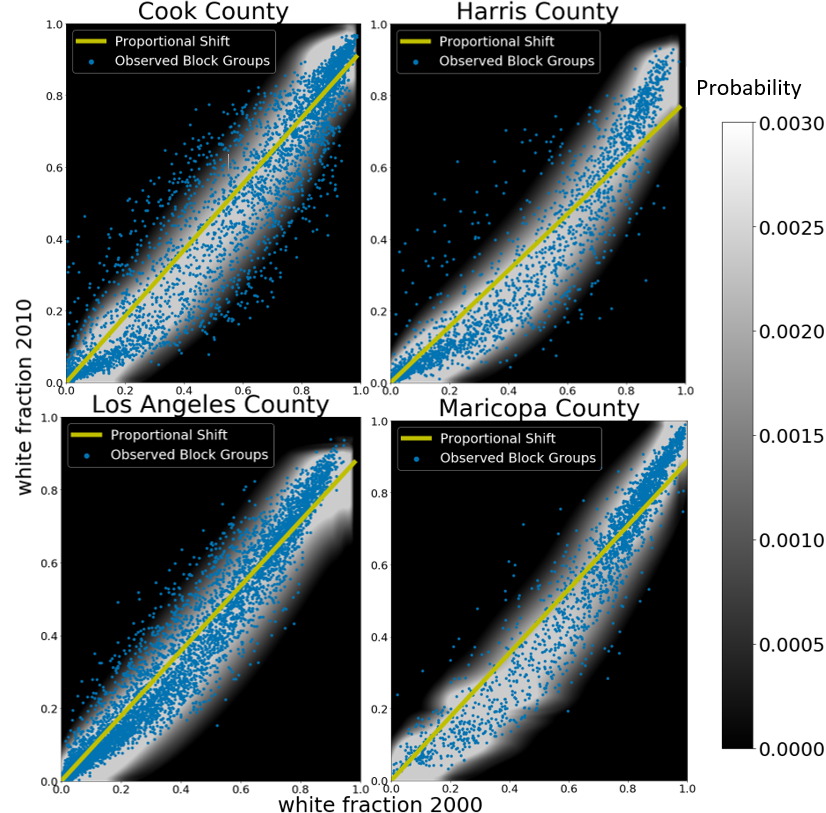